**Text Mining** (hay còn được gọi là khai phá dữ liệu văn bản) là quá trình sử dụng các phương pháp và kỹ thuật để khám phá thông tin, tri thức và dữ liệu từ các nguồn văn bản. Nó tập trung vào việc phân tích, trích xuất và hiểu các thông tin từ văn bản như tin tức, bài viết, tài liệu học thuật, email, trang web, truyện tranh, tài liệu hợp đồng và nhiều nguồn dữ liệu văn bản khác. Text mining thường sử dụng các phương pháp như xử lý ngôn ngữ tự nhiên (NLP), phân loại, trích xuất thông tin, phân tích ý kiến và phân tích chuỗi thời gian để khám phá kiến thức và hiểu ngữ nghĩa từ văn bản.

**Bộ Dữ Liệu "Ben Hamner's Tweets"**


Bộ dữ liệu này chứa toàn bộ dòng tweet của Ben Hamner, CTO của Kaggle, được thu thập đến ngày 12 tháng 12 năm 2017. Nó được xây dựng nhằm mục đích lưu trữ và phân tích những bài viết, suy nghĩ, và quan điểm của ông trên Twitte
https://www.kaggle.com/datasets/mrisdal/ben-hamners-tweets/data

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the data
data = pd.read_csv('/content/drive/MyDrive/big_data.csv', encoding='latin-1')


data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,âThe case for learned index structuresâ - ...,False,29,NaN,2017-12-11 16:21:59,True,NaN,940255351378624512,NaN,"<a href=""http://twitter.com/download/iphone"" r...",benhamner,10,False,False,NaN,NaN
1,@Smerity Lock you in a black box with a window...,False,11,Smerity,2017-12-10 04:16:21,True,9.396588e+17,939710351305670656,15363432.0,"<a href=""http://twitter.com/download/iphone"" r...",benhamner,0,False,False,NaN,NaN
2,What policy outcomes are you aiming to achieve...,False,5,NaN,2017-12-09 22:47:22,True,NaN,939627560631132160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",benhamner,0,False,False,NaN,NaN
3,âMachine learning for systems and systems fo...,False,34,NaN,2017-12-09 22:40:48,False,NaN,939625906775003136,NaN,"<a href=""http://twitter.com/download/iphone"" r...",benhamner,21,False,False,NaN,NaN
4,From the number of talks @goodfellow_ianâs g...,True,180,NaN,2017-12-09 21:59:28,False,NaN,939615505165402112,NaN,"<a href=""http://twitter.com/download/iphone"" r...",benhamner,10,False,False,NaN,NaN


# **Tiền xử lí dữ liệu**

1. Loại bỏ các ký tự đặc biệt và số
•	Loại bỏ tất cả các ký tự không phải là chữ cái (a-z, A-Z) hoặc khoảng trắng (\s).
•	Giữ lại các từ và khoảng cách giữa chúng.
________________________________________
2. Loại bỏ các thẻ HTML
•	Loại bỏ các thẻ HTML hoặc XML như div, p , a , và nội dung bên trong thẻ.
___________
3. Chuyển văn bản thành chữ thường
•	Chuyển toàn bộ văn bản sang chữ thường để tránh phân biệt chữ hoa và chữ thường (ví dụ: "This" và "this").
________________________________________
4. Loại bỏ URL
•	Loại bỏ các URL trong văn bản, ví dụ: http://example.com, https://example.com.
________________________________________
5. Loại bỏ các ký tự đặc biệt
•	Loại bỏ các ký tự đặc biệt như dấu chấm câu, dấu ngoặc, dấu chấm than, v.v.
•	Giữ lại từ và khoảng trắng.
________________________________________
6. Loại bỏ stop words
•	Loại bỏ các từ dừng (stop words) như "and", "is", "the", "of", v.v., vì chúng không mang nhiều ý nghĩa trong phân tích ngữ nghĩa.

In [ ]:
import nltk

# Tải bộ dữ liệu punkt
nltk.download('punkt')

# Tiếp tục thực hiện các bước như trước
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tải bộ dữ liệu stop words
nltk.download('stopwords')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/big_data.csv', encoding='latin-1')

# Hàm làm sạch văn bản
def clean_text(text):
    # Loại bỏ các ký tự đặc biệt và số
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Loại bỏ html
    text = re.sub(r'<.*?>', '', text)
    # Chuyển văn bản thành chữ thường
    text = text.lower()
    # Loại bỏ url
    text = re.sub(r'http\S+', '', text)
    # Loại bỏ các ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    # Loại bỏ stop words
    text = " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

data['clean_text'] = data['text'].apply(clean_text)
print(data.head())

                                                text  favorited  \
0  âThe case for learned index structuresâ - ...      False   
1  @Smerity Lock you in a black box with a window...      False   
2  What policy outcomes are you aiming to achieve...      False   
3  âMachine learning for systems and systems fo...      False   
4  From the number of talks @goodfellow_ianâs g...       True   

   favoriteCount replyToSN              created  truncated    replyToSID  \
0             29       NaN  2017-12-11 16:21:59       True           NaN   
1             11   Smerity  2017-12-10 04:16:21       True  9.396588e+17   
2              5       NaN  2017-12-09 22:47:22       True           NaN   
3             34       NaN  2017-12-09 22:40:48      False           NaN   
4            180       NaN  2017-12-09 21:59:28      False           NaN   

                   id  replyToUID  \
0  940255351378624512         NaN   
1  939710351305670656  15363432.0   
2  939627560631132160        

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print("Văn bản gốc : ")
print(data['text'].iloc[0])
print("Văn bản sau khi xử lí : ")
print(data['clean_text'].iloc[0])

Văn bản gốc : 
âThe case for learned index structuresâ - replacing B-trees and bloom filters with data-aware indices learned throuâ¦ https://t.co/tunW4VcEdO
Văn bản sau khi xử lí : 
case learned index structures replacing btrees bloom filters dataaware indices learned throu


*Loại bỏ văn bản ngắn*

In [ ]:
# Đặt ngưỡng độ dài (ví dụ: bỏ qua các văn bản có độ dài nhỏ hơn 5 ký tự)
threshold = 5

# Hiển thị các văn bản ngắn
short_texts = data[data['clean_text'].str.len() < threshold]
print("Các văn bản ngắn:")
print(short_texts[['clean_text']])

# Loại bỏ các văn bản ngắn
data = data[data['clean_text'].str.len() >= threshold]
# Kiểm tra lại dữ liệu sau khi loại bỏ
print("Số lượng văn bản sau khi loại bỏ các văn bản ngắn:", len(data))

Các văn bản ngắn:
     clean_text
2685         rd
Số lượng văn bản sau khi loại bỏ các văn bản ngắn: 2700


# **Tăng cường dữ liệu ( Data Augmenttation )**

Data Augmentation là một kỹ thuật trong lĩnh vực học máy (Machine Learning) và học sâu (Deep Learning), nhằm tăng cường số lượng và sự đa dạng của dữ liệu huấn luyện bằng cách áp dụng các phép biến đổi hoặc thao tác trên dữ liệu hiện có.

*Thay thế từ viết tắt (Replace abbreviations)*

In [ ]:
import pandas as pd
import re

# Danh sách từ viết tắt và từ thay thế
abbreviations = {
    "I'm": "I am",
    "youre": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "I've": "I have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "u": "you",
    "btw": "by the way",
    "lol": "laugh out loud",
    "idk": "I don't know",
    "omg": "oh my god",
    "brb": "be right back",
    "asap": "as soon as possible",
    "tbh": "to be honest",
    "b4": "before",
    "gr8": "great",
    "pls": "please",
    "thx": "thanks",
    "cya": "see you",
    "w/": "with",
    "yolo": "you only live once"
}

# Hàm chuẩn hóa từ viết tắt
def expand_abbreviations(text, abbreviations=abbreviations):
    # Chuyển đổi văn bản thành danh sách từ
    words = text.split()
    # Thay thế từ viết tắt trong danh sách từ
    expanded_words = [abbreviations.get(word.lower(), word) for word in words]
    # Nối lại các từ đã thay thế
    return " ".join(expanded_words)

# Áp dụng chuẩn hóa từ viết tắt cho cột 'text'
data['clean_texts'] = data['clean_text'].apply(expand_abbreviations)

# In kết quả để kiểm tra
print(data[['clean_text', 'clean_texts']].iloc[110])


clean_text     sir youre arrest attempted international terro...
clean_texts    sir you are arrest attempted international ter...
Name: 110, dtype: object


<ipython-input-237-cef896b7f147>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_texts'] = data['clean_text'].apply(expand_abbreviations)


*Thay thế từ đồng nghĩa ( Synonym Replacement )*

Thay thế từ đồng nghĩa (Synonym Replacement) là một kỹ thuật tăng cường dữ liệu (Data Augmentation) thường được sử dụng trong xử lý ngôn ngữ tự nhiên (NLP). Mục tiêu của phương pháp này là thay thế các từ trong văn bản bằng từ đồng nghĩa của chúng để tạo ra các biến thể khác nhau mà vẫn giữ nguyên ý nghĩa.

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')

def synonym_replacement(text):
    words = text.split()
    new_text = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_text.append(synonym)
        else:
            new_text.append(word)
    return " ".join(new_text)

# Áp dụng vào một phần dữ liệu
data['aug_synonym'] = data['clean_text'].apply(synonym_replacement)
print(data[['clean_text', 'aug_synonym']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          clean_text  \
0  case learned index structures replacing btrees...   
1  smerity lock black box window showing numbers ...   
2  policy outcomes aiming achieve jackclarksf lot...   
3  machine learning systems systems machine learn...   
4  number talks goodfellowians given week suspect...   

                                         aug_synonym  
0  case learn index structure replacement btrees ...  
1  smerity lock black box window screening Number...  
2  policy result aim achieve jackclarksf tons way...  
3  machine learning system system machine learnin...  
4  number negotiation goodfellowians given week s...  


In [ ]:
!pip install googletrans==3.1.0a0

*Dịch ngược( Back Translasion )*

Dịch ngược (Back Translation) là một kỹ thuật tăng cường dữ liệu (Data Augmentation) phổ biến trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP). Phương pháp này hoạt động bằng cách dịch văn bản từ ngôn ngữ nguồn sang ngôn ngữ trung gian, sau đó dịch ngược lại về ngôn ngữ gốc.

In [ ]:
from googletrans import Translator
translator = Translator()
def back_translation(text):
    translated_text = translator.translate(text, src='en', dest='vi').text
    back_translated_text = translator.translate(translated_text, src='vi', dest='en').text
    return back_translated_text
# Áp dụng vào một phần dữ liệu
data['aug_back_translation'] = data['clean_text'].apply(back_translation)
# Chuyển toàn bộ văn bản về dạng chữ thường
data['aug_back_translation'] = data['aug_back_translation'].str.lower()
from googletrans import Translator
translator = Translator()
def back_translation(text):
    translated_text = translator.translate(text, src='en', dest='vi').text
    back_translated_text = translator.translate(translated_text, src='vi', dest='en').text
    return back_translated_text
# Áp dụng vào một phần dữ liệu
data['aug_back_translation'] = data['clean_text'].apply(back_translation)
# Chuyển toàn bộ văn bản về dạng chữ thường
data['aug_back_translation'] = data['aug_back_translation'].str.lower()

# Kiểm tra lại dữ liệu sau khi chuyển về chữ thường
print(data[['clean_text', 'aug_back_translation']].head())

                                          clean_text  \
0  case learned index structures replacing btrees...   
1  smerity lock black box window showing numbers ...   
2  policy outcomes aiming achieve jackclarksf lot...   
3  machine learning systems systems machine learn...   
4  number talks goodfellowians given week suspect...   

                                aug_back_translation  
0  learned index structure by case of b bloom tre...  
1  smerity lock black box window displays trickle...  
2  policy outcomes aimed at achieving jackclarksf...  
3  machine learning system machine learning syste...  
4  the number of negotiations good friends had du...  


*Phân đoạn từ ( word tokenization )*

Phân đoạn từ (Word Tokenization) là một bước quan trọng trong xử lý ngôn ngữ tự nhiên (NLP), nơi một văn bản được chia thành các đơn vị nhỏ hơn, gọi là tokens. Trong trường hợp này, tokens là các từ trong văn bản. Quá trình phân đoạn từ giúp chuyển đổi văn bản thô thành các thành phần dễ xử lý cho các mô hình học máy, phân loại văn bản, dịch máy, phân tích cảm xúc, v.v.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Hàm tiền xử lý và phân đoạn từ :
def preprocess_and_tokenize(text):
    # Phân đoạn từ
    words = word_tokenize(text)
    return words

# Áp dụng vào một phần dữ liệu
data['tokenized_text'] = data['aug_back_translation'].apply(preprocess_and_tokenize)
print(data[['aug_back_translation', 'tokenized_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                aug_back_translation  \
0  learned index structure by case of b bloom tre...   
1  smerity lock black box window displays trickle...   
2  policy outcomes aimed at achieving jackclarksf...   
3  machine learning system machine learning syste...   
4  the number of negotiations good friends had du...   

                                      tokenized_text  
0  [learned, index, structure, by, case, of, b, b...  
1  [smerity, lock, black, box, window, displays, ...  
2  [policy, outcomes, aimed, at, achieving, jackc...  
3  [machine, learning, system, machine, learning,...  
4  [the, number, of, negotiations, good, friends,...  


# **Phân tích dữ liệu cơ bản (Exploratory Data Analysis - EDA)**

EDA là một bước quan trọng trong quá trình phân tích dữ liệu, nhằm khám phá, tóm tắt và trực quan hóa các đặc điểm chính của dữ liệu trước khi áp dụng các mô hình học máy hoặc các phương pháp thống kê phức tạp. EDA giúp bạn hiểu rõ hơn về cấu trúc, mối quan hệ, và các đặc điểm bất thường của dữ liệu.



*Kiểm tra độ dài văn bản*

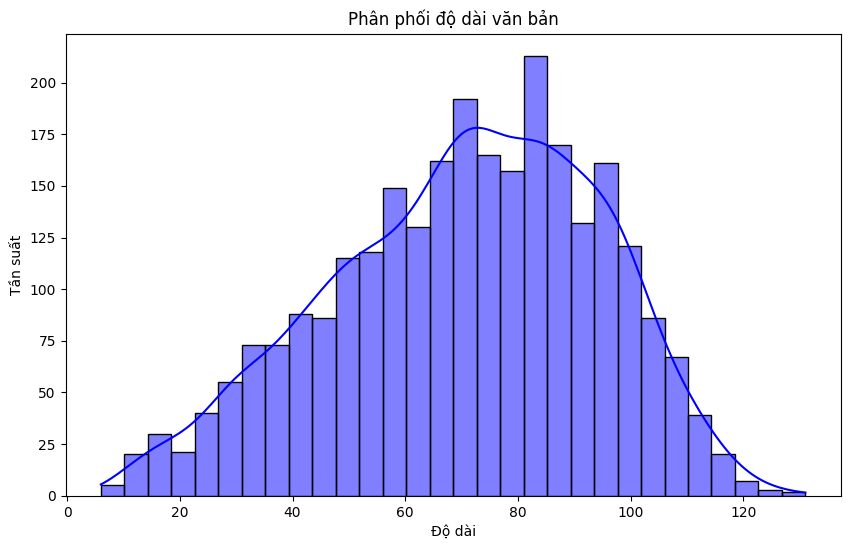

In [ ]:
data['text_length'] = data['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Phân phối độ dài văn bản')
plt.xlabel('Độ dài')
plt.ylabel('Tần suất')
plt.show()


*Từ phổ biến nhất (Word Frequency):*


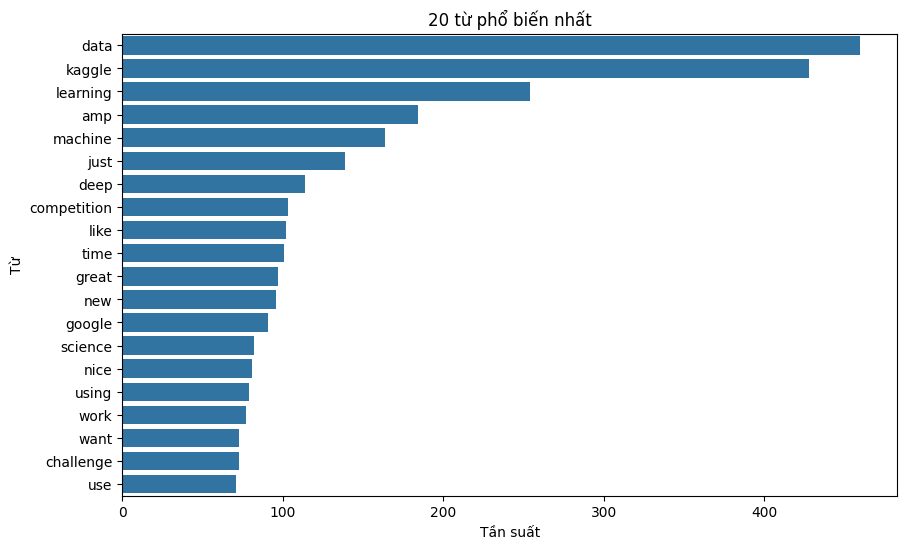

In [ ]:
from collections import Counter
word_counts = Counter(" ".join(data['clean_text']).split())
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('20 từ phổ biến nhất')
plt.xlabel('Tần suất')
plt.ylabel('Từ')
plt.show()


*Biểu đồ đám mây từ (Word Cloud):*

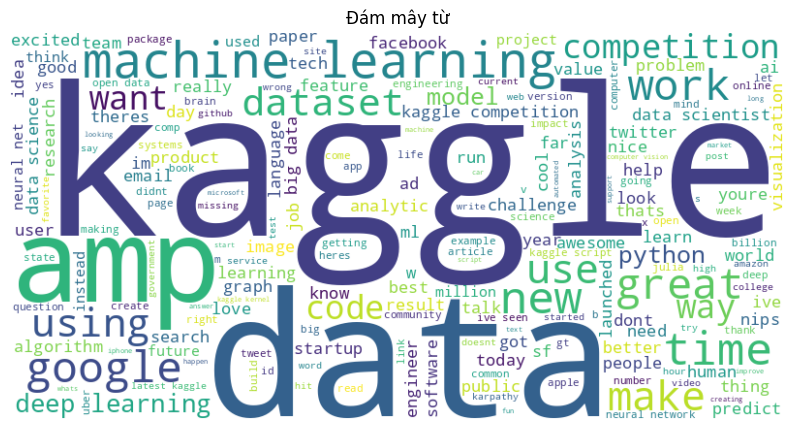

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['clean_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Đám mây từ')
plt.show()


*Tính toán tương quan*

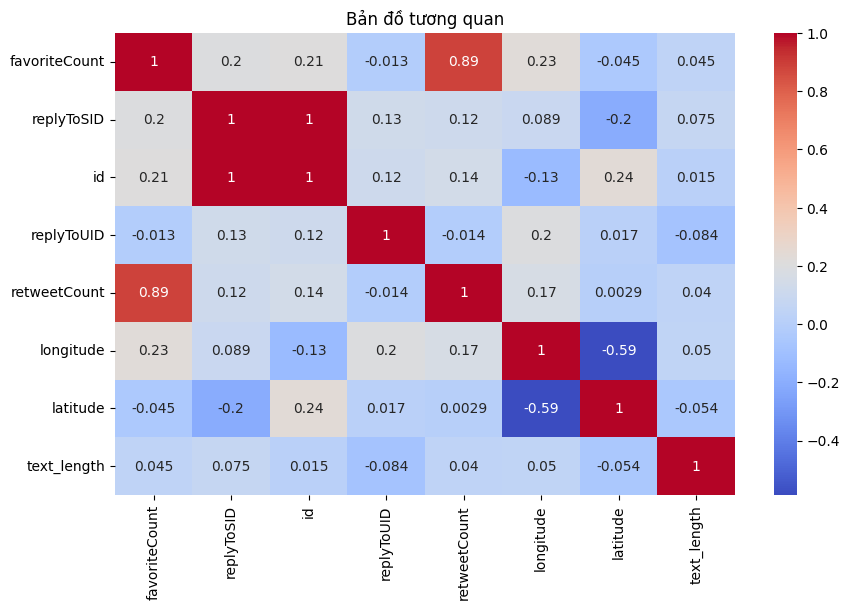

In [ ]:
# Chỉ chọn các cột số để tính toán tương quan
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Bản đồ tương quan')
plt.show()

*Phân tích mối quan hệ giữa các thuộc tính và văn bản*

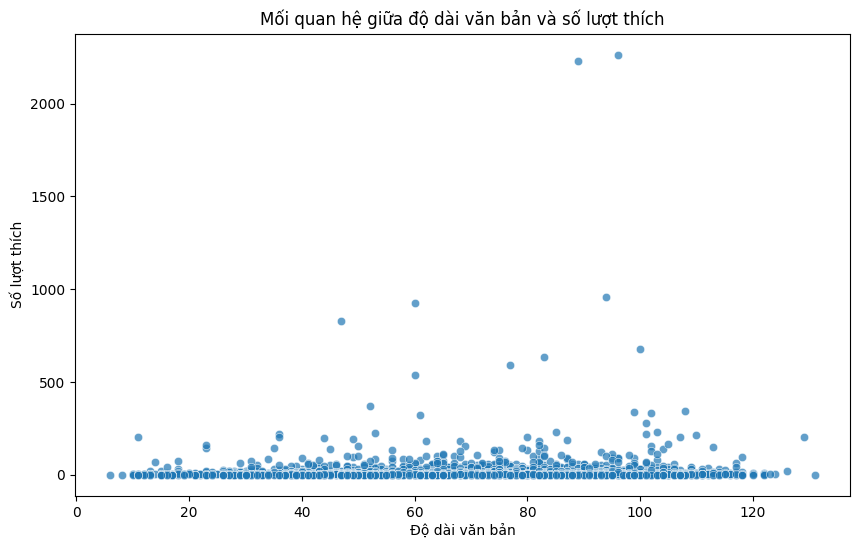

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['text_length'], y=data['favoriteCount'], alpha=0.7)
plt.title('Mối quan hệ giữa độ dài văn bản và số lượt thích')
plt.xlabel('Độ dài văn bản')
plt.ylabel('Số lượt thích')
plt.show()


*Phân tích cụm từ phổ biến (Cụm 2 từ)*

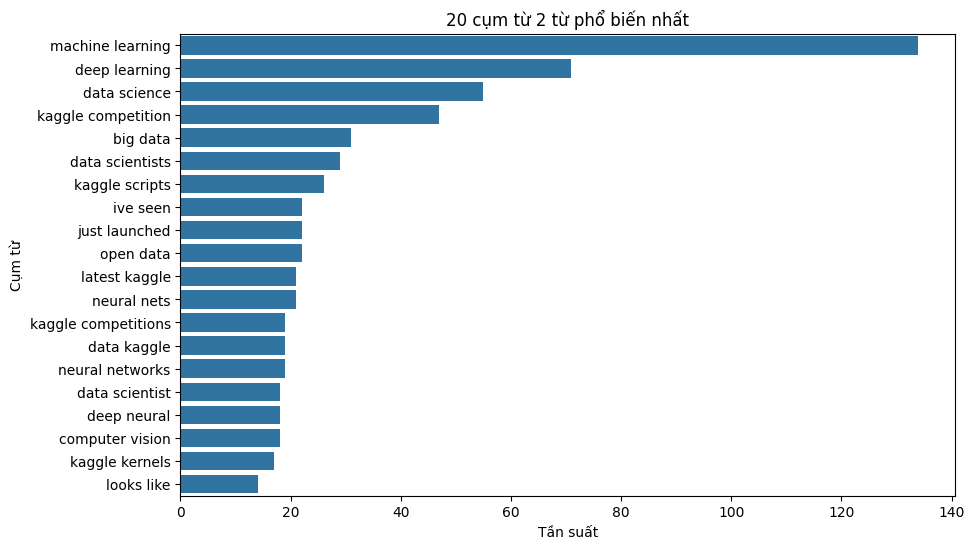

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
bigrams = vectorizer.fit_transform(data['clean_text'])
bigram_freq = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index)
plt.title('20 cụm từ 2 từ phổ biến nhất')
plt.xlabel('Tần suất')
plt.ylabel('Cụm từ')
plt.show()


*Phân tích cụm từ phổ biến (Cụm 3 từ )*

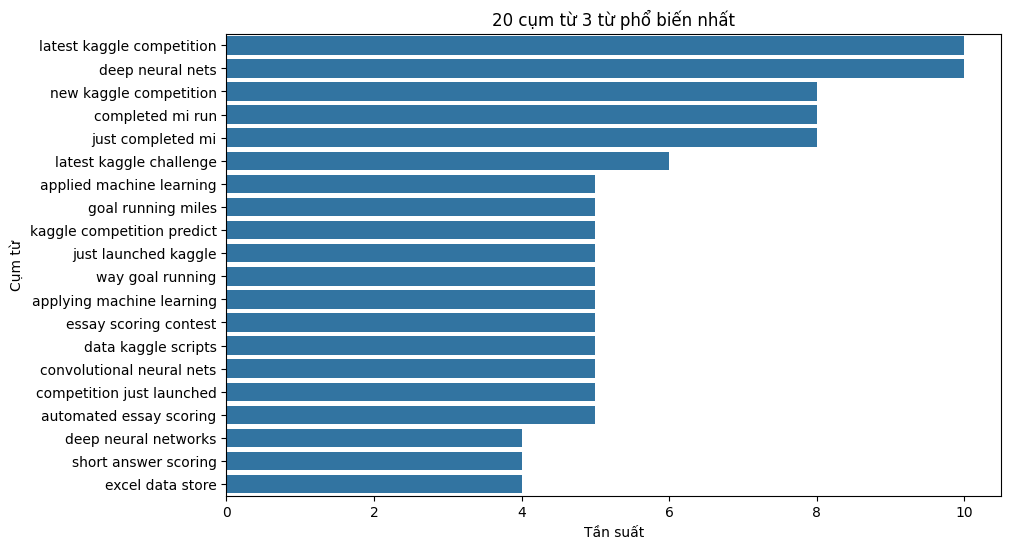

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=20)
bigrams = vectorizer.fit_transform(data['clean_text'])
bigram_freq = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index)
plt.title('20 cụm từ 3 từ phổ biến nhất')
plt.xlabel('Tần suất')
plt.ylabel('Cụm từ')
plt.show()


*Phân cụm dữ liệu văn bản*

<ipython-input-249-e1cc36b72c26>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['cluster'], palette='viridis')


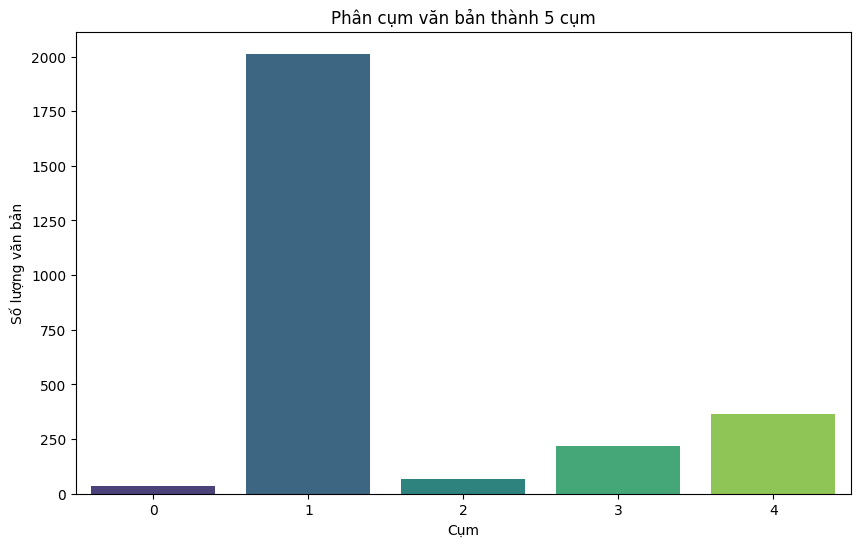

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(data['clean_text'])

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_tfidf)

plt.figure(figsize=(10, 6))
sns.countplot(x=data['cluster'], palette='viridis')
plt.title('Phân cụm văn bản thành 5 cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng văn bản')
plt.show()


In [ ]:
for cluster in range(5):
    cluster_words = X_tfidf[data['cluster'] == cluster].toarray().sum(axis=0)
    cluster_top_words = [tfidf.get_feature_names_out()[i] for i in cluster_words.argsort()[-10:]]
    print(f"Cụm {cluster}: {', '.join(cluster_top_words)}")


Cụm 0: corporation, pivot, new, pandas, data, crime, charts, humanity, excel, microsoft
Cụm 1: challenge, great, new, google, competition, like, time, amp, just, kaggle
Cụm 2: amp, using, network, net, recurrent, convolutional, nets, deep, networks, neural
Cụm 3: intelligence, amp, systems, using, great, models, kaggle, deep, machine, learning
Cụm 4: scientist, amp, visualization, want, open, big, scientists, kaggle, science, data


*Phân tích cảm xúc (Sentiment Analysis)*

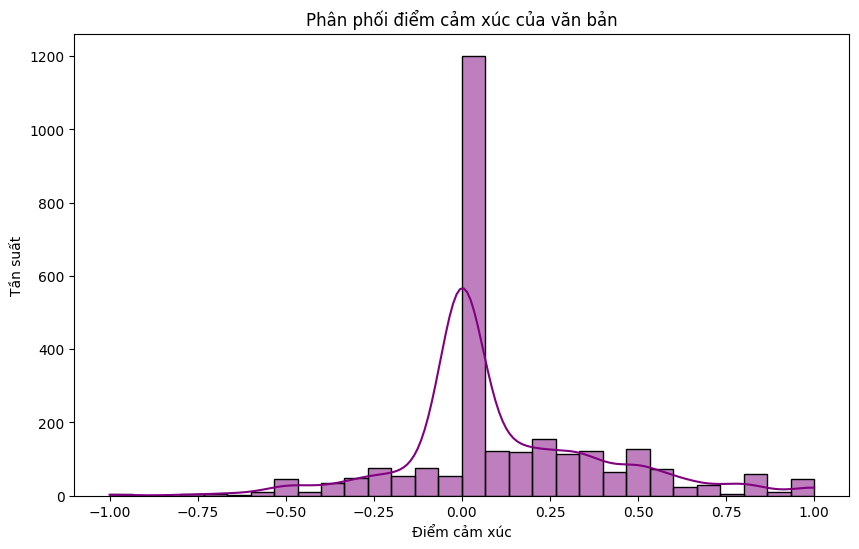

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment'] = data['clean_text'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], kde=True, bins=30, color='purple')
plt.title('Phân phối điểm cảm xúc của văn bản')
plt.xlabel('Điểm cảm xúc')
plt.ylabel('Tần suất')
plt.show()


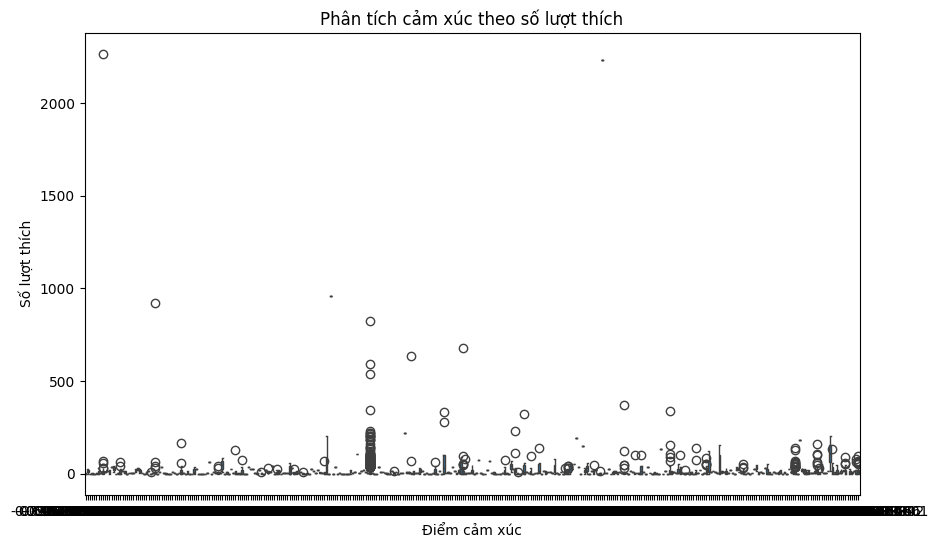

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='favoriteCount', data=data)
plt.title('Phân tích cảm xúc theo số lượt thích')
plt.xlabel('Điểm cảm xúc')
plt.ylabel('Số lượt thích')
plt.show()


*Phân loại cảm xúc*

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from textblob import TextBlob # Nhập TextBlob để phân loại tình cảm

# Xác định hàm để phân loại tình cảm thành các danh mục riêng biệt
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
y = data['text'].apply(classify_sentiment)
print(data['text'].head())
print(y)

0    âThe case for learned index structuresâ - ...
1    @Smerity Lock you in a black box with a window...
2    What policy outcomes are you aiming to achieve...
3    âMachine learning for systems and systems fo...
4    From the number of talks @goodfellow_ianâs g...
Name: text, dtype: object
0        neutral
1       negative
2       negative
3        neutral
4        neutral
          ...   
2696    positive
2697    positive
2698    positive
2699     neutral
2700     neutral
Name: text, Length: 2700, dtype: object


Text(0, 0.5, 'Số lượng')

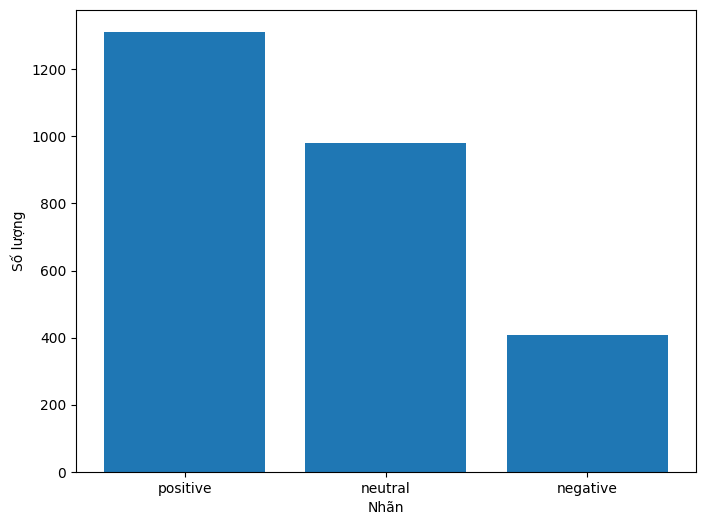

In [ ]:
import matplotlib.pyplot as plt
# Kiểm tra phân phối nhãn
label_counts = y.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

*So sánh theo danh mục (Categorical Analysis)*

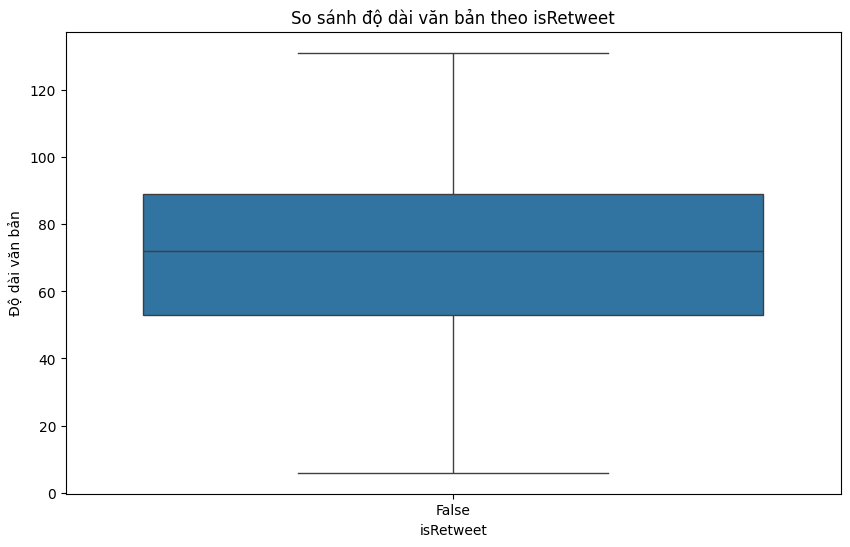

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isRetweet', y='text_length', data=data)
plt.title('So sánh độ dài văn bản theo isRetweet')
plt.xlabel('isRetweet')
plt.ylabel('Độ dài văn bản')
plt.show()


*Phân tích chủ đề*

LDA (Latent Dirichlet Allocation) là một phương pháp phổ biến trong phân tích chủ đề (topic modeling) trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP). Mục tiêu của LDA là xác định các chủ đề tiềm ẩn trong một tập hợp các văn bản mà không cần đến thông tin nhãn hay dữ liệu đã được phân loại sẵn. Phương pháp này được sử dụng để phân nhóm các tài liệu theo chủ đề chung dựa trên các từ xuất hiện trong chúng.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['clean_text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Hiển thị từ khóa cho từng chủ đề
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:  ['years', 'challenge', 'great', 'search', 'kaggles', 'just', 'amp', 'competition', 'data', 'kaggle']
Topic 1:  ['engineers', 'tech', 'run', 'deep', 'just', 'sf', 'google', 'machine', 'like', 'learning']
Topic 2:  ['google', 'competition', 'seen', 'time', 'ive', 'nice', 'python', 'data', 'new', 'kaggle']
Topic 3:  ['nips', 'great', 'use', 'machine', 'amp', 'time', 'neural', 'deep', 'data', 'learning']
Topic 4:  ['scientists', 'code', 'want', 'just', 'amp', 'big', 'machine', 'kaggle', 'learning', 'data']



# **Stemming và Lemmatization**

*Stemming* là một quá trình đơn giản hơn, cắt bỏ tiền tố và hậu tố (tức là tiền tố) để rút gọn một từ thành dạng gốc của nó. Dạng gốc này, được gọi là gốc, có thể không phải là một từ hợp lệ trong ngôn ngữ. Ví dụ: các từ "running", "runner" và "runs" đều có thể bắt nguồn từ "run" hoặc "runn", các thuật toán bắt nguồn từ thuật toán tùy chọn có thể được sử dụng.

*Lemmatization* là một quá trình rút gọn các từ thành cơ sở dữ liệu hoặc dạng từ điển, được gọi là bổ đề. Kỹ thuật này xem xét ngữ cảnh và ý nghĩa của các từ, chắc chắn rằng có một cơ sở thuộc về từ điển của ngôn ngữ. Ví dụ, các từ "running", "ran" và "runs" đều được bổ nghĩa thành bổ đề "run".


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Tải dữ liệu cần thiết
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
# Khởi tạo Stemming và Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Hàm áp dụng cả Stemming và Lemmatization
def apply_stemming_lemmatization(text):
    # Tách từ
    words = word_tokenize(text)

    # Lemmatization: Từ gốc hợp ngữ cảnh
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Stemming: Chuyển về dạng rút gọn
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return " ".join(stemmed_words)

# Áp dụng cả Stemming và Lemmatization vào cột văn bản sạch
data['processed_text'] = data['clean_text'].apply(apply_stemming_lemmatization)

# In ra kết quả
print(data[['clean_text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                          clean_text  \
0  case learned index structures replacing btrees...   
1  smerity lock black box window showing numbers ...   
2  policy outcomes aiming achieve jackclarksf lot...   
3  machine learning systems systems machine learn...   
4  number talks goodfellowians given week suspect...   

                                      processed_text  
0  case learn index structur replac btree bloom f...  
1  smeriti lock black box window show number swit...  
2  polici outcom aim achiev jackclarksf lot way p...  
3  machin learn system system machin learn jeffde...  
4  number talk goodfellowian given week suspect f...  


# **Mã hóa văn bản**

**1. TF-IDF**

TF-IDF (Term Frequency-Inverse Document Frequency) là một kỹ thuật vector hóa văn bản phổ biến, được sử dụng để chuyển đổi văn bản thành dạng số để có thể sử dụng trong các mô hình học máy. Mục tiêu của TF-IDF là xác định mức độ quan trọng của từng từ trong một tập văn bản, giúp mô hình hiểu được tầm quan trọng của từ trong mỗi tài liệu so với toàn bộ bộ sưu tập.

Các bước vector hóa văn bản với TfidfVectorizer:

Term Frequency (TF): Là tần suất xuất hiện của một từ trong một tài liệu cụ thể. Công thức tính TF của từ
𝑡
t trong tài liệu
𝑑
d là:

TF
(
𝑡
,
𝑑
)
=
Số lần từ t xuất hiện trong d / Tống số từ trong d

Inverse Document Frequency (IDF): Là thước đo mức độ quan trọng của một từ trong toàn bộ bộ sưu tập văn bản. IDF giúp giảm trọng số của những từ xuất hiện quá nhiều (như "the", "is", "in", v.v.). Công thức tính IDF của từ
𝑡
t là:

IDF
(
𝑡
)
=
log ( N / Số lượng tài liệu chứa từ t )
Trong đó:

𝑁
N là tổng số tài liệu trong bộ sưu tập.
Số lượng tài liệu chứa từ
𝑡
t là số tài liệu mà từ
𝑡
t xuất hiện ít nhất một lần.
TF-IDF: Là sự kết hợp giữa TF và IDF. Công thức tính TF-IDF của từ
𝑡
t trong tài liệu
𝑑
d là:

TF-IDF
(
𝑡
,
𝑑
)
=
TF
(
𝑡
,
𝑑
)
×
IDF
(
𝑡
)
TF-IDF(t,d)=TF(t,d)×IDF(t)




Ví dụ về TF-IDF
Giả sử bộ dữ liệu sau:

"I love programming"
"I love machine learning"
"I love AI and machine learning"

TF của từ "love" trong dữ liệu:

 "I love programming" → TF = 1/3 (1 lần "love" trong 3 từ)

 "I love machine learning" → TF = 1/4 (1 lần "love" trong 4 từ)
  
 "I love AI and machine learning" → TF = 1/5 (1 lần "love" trong 5 từ)

IDF của từ "love":

Từ "love" xuất hiện trong tất cả ba tài liệu, do đó IDF =
log
⁡
(
3
/
3
)
=
0
log(3/3)=0.
Vì IDF bằng 0, trọng số TF-IDF cho từ "love" sẽ là 0 trong mọi tài liệu.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Giữ lại 5000 từ phổ biến nhất

# Vector hóa văn bản
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()

# Hiển thị kích thước của ma trận TF-IDF
print("Kích thước của ma trận TF-IDF:", X_tfidf.shape)

# Lấy danh sách từ vựng
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
print("Một số từ trong từ vựng TF-IDF:", tfidf_vocab[:10])  # Hiển thị 10 từ đầu tiên


Kích thước của ma trận TF-IDF: (2700, 5000)
Một số từ trong từ vựng TF-IDF: ['aab' 'aaron' 'ab' 'abacu' 'abcdefghijklmnop' 'abhithakur' 'abil' 'abl'
 'abomin' 'aboveground']


**2. Bag of Words**

Bag of Words (BoW) là một phương pháp đơn giản nhưng mạnh mẽ trong việc mã hóa văn bản thành các đặc trưng số để sử dụng trong các mô hình học máy. Phương pháp này biến văn bản thành một tập hợp các từ, không quan tâm đến thứ tự của các từ trong câu, mà chỉ xem xét sự xuất hiện của từng từ.

Phương pháp Bag of Words hoạt động bằng cách:

Bước 1: Xây dựng một từ điển (vocabulary) từ tất cả các từ xuất hiện trong tập dữ liệu văn bản.

Bước 2: Biến mỗi văn bản thành một vector số, trong đó mỗi chỉ mục tương ứng với một từ trong từ điển, và giá trị tại mỗi chỉ mục là số lần từ đó xuất hiện trong văn bản (hoặc các giá trị khác như TF-IDF).

Ví dụ:

Tập dữ liệu:

"I love programming"

"I love machine learning"

"I love AI and machine learning"

Từ điển (vocabulary):

["I", "love", "programming", "machine", "learning", "AI", "and"]

Vectors đại diện cho các văn bản:

"I love programming" → [1, 1, 1, 0, 0, 0, 0]

"I love machine learning" → [1, 1, 0, 1, 1, 0, 0]

"I love AI and machine learning" → [1, 1, 0, 1, 1, 1, 1]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Khởi tạo CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')  # Sử dụng tối đa 5000 đặc trưng

# Thực hiện vector hóa
X_bow = vectorizer.fit_transform(data['processed_text']).toarray()

# In ra kích thước của ma trận BoW
print("Kích thước của ma trận BoW:", X_bow.shape)

# Lấy danh sách các từ (từ vựng)
vocabulary = vectorizer.get_feature_names_out()
print("Một số từ trong từ vựng:", vocabulary[:10])  # In 10 từ đầu tiên


Kích thước của ma trận BoW: (2700, 5000)
Một số từ trong từ vựng: ['aab' 'aaron' 'ab' 'abacu' 'abcdefghijklmnop' 'abhithakur' 'abil' 'abl'
 'abomin' 'aboveground']


In [ ]:
print("BoW vector (dòng đầu tiên):", X_bow[0])
print("TF-IDF vector (dòng đầu tiên):", X_tfidf[0])


BoW vector (dòng đầu tiên): [0 0 0 ... 0 0 0]
TF-IDF vector (dòng đầu tiên): [0. 0. 0. ... 0. 0. 0.]


**3. Word2Vec**

Word2Vec là một mô hình học sâu để tạo ra các biểu diễn vector cho các từ trong một không gian vector học, trong đó các từ có nghĩa tương tự sẽ có các vector gần nhau trong không gian này. Mô hình này không chỉ đơn giản là mã hóa một từ thành một vector cố định, mà các vector này chứa đựng các thông tin ngữ nghĩa của từ đó. Word2Vec sử dụng một mạng nơ-ron đơn giản để học các vector từ một lượng lớn văn bản.
Quá trình huấn luyện Word2Vec có thể được chia thành các bước chính sau:

Thu thập dữ liệu: Dữ liệu văn bản (các câu, đoạn văn) được thu thập và làm sạch.

Tạo ngữ cảnh và từ mục tiêu: Dựa trên các mô hình CBOW hoặc Skip-Gram, ta sẽ xác định từ mục tiêu và các từ ngữ cảnh tương ứng.

Huấn luyện mạng nơ-ron: Mạng nơ-ron học các vector từ dữ liệu, và các từ trong cùng ngữ cảnh sẽ có các vector gần nhau trong không gian vector.

Đánh giá kết quả: Kiểm tra các tính chất của vector, như khả năng dự đoán các từ đồng nghĩa, từ trái nghĩa, hoặc các phép toán từ ngữ nghĩa.


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize văn bản (nếu chưa có)
data['tokens'] = data['processed_text'].apply(word_tokenize)

# Huấn luyện mô hình Word2Vec (bạn có thể sử dụng pre-trained model nếu có)
model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Lấy vector của một từ cụ thể
vector = model.wv['talk']
print(vector)


[-0.01126357  0.02970085  0.00119685  0.00397359  0.00773719 -0.03990132
  0.01913077  0.06842087 -0.01459043 -0.01136793 -0.01463357 -0.04159845
 -0.01395552  0.01401705  0.01162268 -0.01880243  0.00466316 -0.03340514
  0.00419195 -0.05948386  0.02125518  0.01656383  0.03348264 -0.01062696
 -0.00973606 -0.00690352 -0.01251719 -0.00539855 -0.02920249  0.00895138
  0.04424518 -0.00549083  0.01101288 -0.02135417 -0.00906045  0.02609257
  0.01103188 -0.04174347 -0.01129079 -0.05308429 -0.0115294  -0.01658829
 -0.01529527  0.00343691  0.02372894  0.00322562 -0.01354073 -0.01154171
  0.01778303  0.01693289  0.02124785 -0.0139326  -0.01922336  0.00455897
 -0.03057427  0.00806011  0.02675921 -0.00469902 -0.02362573  0.00627525
  0.01268206  0.01232634 -0.01908197  0.0107369  -0.03691654  0.02950637
  0.00340279  0.02037664 -0.03064535  0.02600501 -0.02352219  0.01320245
  0.01926921 -0.00414699  0.01676121  0.00875965 -0.00347207 -0.00486401
 -0.02196888  0.01370644 -0.00677334 -0.00533246 -0

In [ ]:
similar_words = model.wv.most_similar('talk', topn=5)  # 5 từ gần nhất với "talk"
print(similar_words)


[('use', 0.9616531133651733), ('data', 0.9588435292243958), ('work', 0.9581749439239502), ('kaggl', 0.9573122262954712), ('amp', 0.9560591578483582)]


In [ ]:
import numpy as np

# Hàm lấy vector trung bình cho mỗi câu
def get_average_word2vec(tokens, model, vector_size=100):
    # Lấy các vector cho từng từ
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Áp dụng hàm cho mỗi câu
data['word2vec'] = data['tokens'].apply(lambda x: get_average_word2vec(x, model))

# In ra một số kết quả để kiểm tra
print(data[['processed_text', 'word2vec']].head())


                                      processed_text  \
0  case learn index structur replac btree bloom f...   
1  smeriti lock black box window show number swit...   
2  polici outcom aim achiev jackclarksf lot way p...   
3  machin learn system system machin learn jeffde...   
4  number talk goodfellowian given week suspect f...   

                                            word2vec  
0  [-0.008460079, 0.017624816, 7.9350626e-05, 0.0...  
1  [-0.0028981783, 0.0055369698, 0.0010388222, -0...  
2  [-0.005404428, 0.007315569, 0.002619278, 0.003...  
3  [-0.021299805, 0.034439724, -0.0017952832, 0.0...  
4  [-0.0066029164, 0.013327922, 0.00068453216, -0...  


# **BERT (Bidirectional Encoder Representations from Transformers)**

*BERT (Bidirectional Encoder Representations from Transformers)* tận dụng mạng nơ-ron dựa trên máy biến áp để hiểu và tạo ra ngôn ngữ tương tự cho người dùng. BERT sử dụng kiến ​​trúc có bộ mã hóa chỉ. Trong kiến ​​trúc Transformer ban đầu , có cả module bộ mã hóa và giải mã. Quyết định sử dụng kiến ​​trúc có bộ mã hóa duy nhất trong BERT cho thấy sức mạnh chính của việc hiểu đầu chuỗi chuỗi hơn là tạo ra đầu chuỗi chuỗi.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Khởi tạo tokenizer và model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

# Hàm để lấy vector từ BERT
def get_bert_embedding(text, model=model_bert, tokenizer=tokenizer):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0).detach().numpy()  # Loại bỏ batch dimension
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))  # Lấy các token từ input_ids
    return tokens, embeddings

#Áp dụng BERT để lấy embedding cho từng câu
data['bert_embeddings'] = data['processed_text'].apply(get_bert_embedding)

# In ra token và embedding của câu đầu tiên
tokens, embeddings = data['bert_embeddings'][0]
print("Tokens and their corresponding BERT embeddings for the first sentence:")
for token, embedding in zip(tokens, embeddings):
    print(f"Token: {token}, Embedding: {embedding[:5]}")  # In 5 giá trị đầu của mỗi embedding


Tokens and their corresponding BERT embeddings for the first sentence:
Token: [CLS], Embedding: [-0.46268797 -0.36037973 -0.08453041 -0.09004917 -0.40489048]
Token: case, Embedding: [ 0.18536738 -0.10017093  0.2950316  -0.04302086 -0.26549697]
Token: learn, Embedding: [-0.19161236 -0.1991055   0.541178    0.17877148  0.5493333 ]
Token: index, Embedding: [ 0.24125405 -0.1334665   0.5024059   0.14204518  0.738206  ]
Token: st, Embedding: [-0.48657906 -0.7487659   0.4894574   0.2253046  -0.29170698]
Token: ##ru, Embedding: [-1.6030213  -1.2553247   0.54063964 -0.2407898   0.7422407 ]
Token: ##ct, Embedding: [-0.69627553 -1.3036832   0.68007106  0.22602569  0.22762522]
Token: ##ur, Embedding: [-0.0075457  -0.4726938   0.2988734  -0.22120622  0.47832578]
Token: rep, Embedding: [-0.54959863 -0.5583134   0.566805    0.07341616 -0.39625135]
Token: ##la, Embedding: [-0.3343465  -0.35354316  0.29437098 -0.11207556  0.3390882 ]
Token: ##c, Embedding: [ 0.11524126 -0.3796467   0.45615295 -0.058233

# **Cân bằng dữ liệu - Smote**

*SMOTE (Synthetic Minority Over-sampling Technique)* là một kỹ thuật tăng cường dữ liệu được sử dụng trong các bài toán phân loại để giải quyết vấn đề mất cân bằng lớp (class imbalance). Trong các bài toán học máy, mất cân bằng lớp xảy ra khi một hoặc nhiều lớp có số lượng mẫu rất ít so với các lớp khác. Điều này có thể dẫn đến việc mô hình học không tốt đối với các lớp ít mẫu, vì các lớp này không được biểu diễn đầy đủ trong quá trình huấn luyện.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention, Concatenate, Input, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Chuyển BERT embeddings thành ma trận numpy với padding
def extract_bert_embeddings(embedding_data):
    embeddings = [embedding[1] for embedding in embedding_data]
    max_length = max(len(embedding) for embedding in embeddings)
    padded_embeddings = [np.pad(embedding, ((0, max_length - len(embedding)), (0, 0)), 'constant') for embedding in embeddings]
    return np.array(padded_embeddings)

# Tạo X và y
X = extract_bert_embeddings(data['bert_embeddings'])
y = data['text'].apply(classify_sentiment)  # Label hoặc cột mục tiêu, sử dụng nhãn gốc

# Chuyển đổi y thành dạng one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y_one_hot)
X_resampled = X_resampled.reshape(X_resampled.shape[0], X.shape[1], X.shape[2])

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Text(0, 0.5, 'Số lượng')

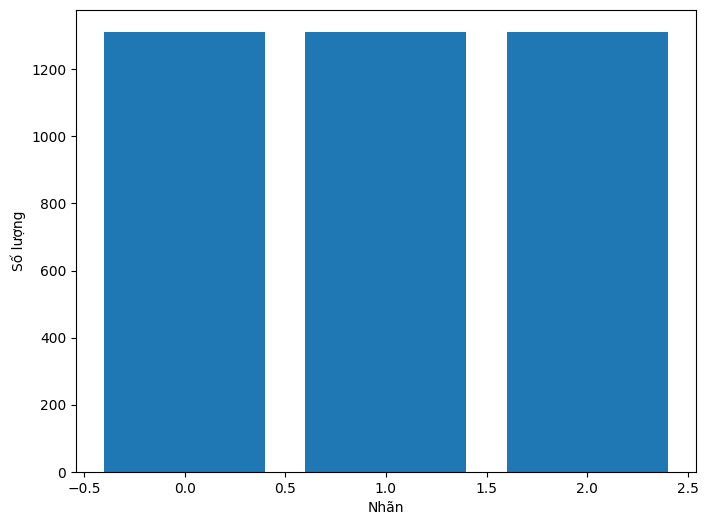

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

# Kiểm tra phân phối nhãn
# Chuyển đổi y_resampled thành pandas Series trước khi sử dụng value_counts()
label_counts = pd.Series(y_resampled.argmax(axis=1)).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# **Huấn luyện mô hình LSTM và Attention Mechanism**

1. LSTM (Long Short-Term Memory):
 LSTM là một loại mạng nơ-ron hồi tiếp (RNN) có khả năng duy trì thông tin qua các bước thời gian dài, nhờ vào cơ chế cổng. LSTM rất hữu ích khi xử lý dữ liệu chuỗi hoặc dữ liệu thời gian, nhưng một vấn đề lớn của LSTM là nó có thể gặp khó khăn khi cần tập trung vào những phần quan trọng trong chuỗi dài mà không phải là tất cả các bước.

2. Attention Mechanism:
Attention Mechanism là một kỹ thuật được phát triển để giúp mô hình chú ý (attention) vào các phần quan trọng trong đầu vào khi đưa ra dự đoán, thay vì chỉ xử lý toàn bộ chuỗi đầu vào một cách đồng đều. Trong các mô hình sử dụng attention, mỗi phần của đầu vào sẽ được gán một trọng số (weight) tùy theo mức độ quan trọng đối với nhiệm vụ hiện tại.

3. Attention với LSTM:
Khi kết hợp Attention với LSTM, mô hình sẽ sử dụng LSTM để học các phụ thuộc dài hạn trong chuỗi, trong khi Attention sẽ giúp mô hình chú ý vào các phần quan trọng của chuỗi trong mỗi bước thời gian.

LSTM tạo ra một chuỗi các đại diện (embeddings) cho mỗi bước thời gian.
Attention sau đó gán các trọng số cho từng bước thời gian trong chuỗi, giúp mô hình chỉ tập trung vào những phần quan trọng nhất của chuỗi để dự đoán kết quả.


In [ ]:
# Kiến trúc mô hình với Attention và LSTM
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layer
lstm_output = LSTM(128, return_sequences=True)(inputs)

# Attention layer
attention_output = Attention(use_scale=True)([lstm_output, lstm_output])

# Giảm chiều với GlobalAveragePooling1D để khắc phục lỗi dimension mismatch
pooled_output = GlobalAveragePooling1D()(attention_output)

# Dense layer
dense_output = Dense(64, activation='relu')(pooled_output)
dropout_output = Dropout(0.5)(dense_output)

# Output layer
outputs = Dense(y_train.shape[1], activation='softmax')(dropout_output)

# Mô hình
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.4001 - loss: 1.0800 - val_accuracy: 0.5140 - val_loss: 0.9893
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.5683 - loss: 0.9369 - val_accuracy: 0.6180 - val_loss: 0.8363
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.6571 - loss: 0.7875 - val_accuracy: 0.6574 - val_loss: 0.7618
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.7499 - loss: 0.6119 - val_accuracy: 0.7132 - val_loss: 0.6921
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.7963 - loss: 0.5098 - val_accuracy: 0.7386 - val_loss: 0.6491
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.8391 - loss: 0.4245 - val_accuracy: 0.7348 - val_loss: 0.6668
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.8792 - loss: 0.3036 - val_accuracy: 0.7475 - val_loss: 0.6974
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9162 - loss: 0.2361 - val_accu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


max_length = max(len(embedding[1]) for embedding in data['bert_embeddings'])
# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Lớp Embedding để chuyển văn bản thành các vector từ vựng
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_length))

# Lớp LSTM với 100 units
model.add(LSTM(100, return_sequences=False))

# Lớp Dropout để giảm overfitting
model.add(Dropout(0.5))

# Lớp Dense để phân loại 3 loại cảm xúc
model.add(Dense(3, activation='softmax'))  # có 3 lớp cảm xúc: positive, negative, neutral

# Biên dịch mô hình
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình

sample_input = np.zeros((1, max_length))
_ = model(sample_input)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (1, 42, 128)                │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (1, 128)                    │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (1, 128)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (1, 3)                      │             387 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_9 (Embedding)              │ (1, 3, 100)                 │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (1, 100)                    │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (1, 100)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (1, 3)                      │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,492,674 (9.51 MB)

 Trainable params: 2,492,674 (9.51 MB)

 Non-trainable params: 0 (0.00 B)

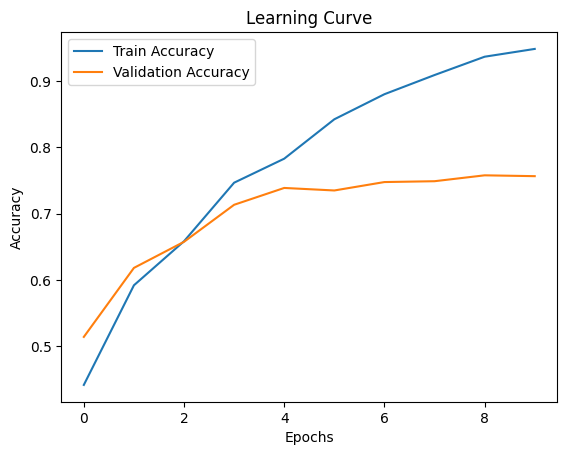

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [ ]:
def predict_sentiment(text):
   # Mã hóa văn bản bằng bộ mã hóa BERT
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model_bert(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

    #Giả sử max_length
    embeddings = embeddings.reshape(1, -1)  # Reshape to (1, embedding_dim)
    embeddings_padded = pad_sequences(embeddings, maxlen=max_length, padding='post')

    # Make prediction
    prediction = model.predict(embeddings_padded)
    sentiment = label_encoder.inverse_transform([np.argmax(prediction)])
    return sentiment[0]

# Ví dụ dự đoán
sample_text = "I love this book"
predicted_sentiment = predict_sentiment(sample_text)
print(f'Predicted Sentiment: {predicted_sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
Predicted Sentiment: positive
